In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [91]:
#import my dependencies and functions
from anna import *
# Import the style from Matplotlib.
from matplotlib import style

In [3]:
#get data

city = getData('Resources','city_data.csv')
ride = getData('Resources','ride_data.csv')

In [4]:
# merge data frames
pyber = mergedDF(ride,city,'left','city')

In [5]:
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
#make group
types = groupThis(pyber,'type')

In [7]:
#  1. Get the total rides for each city type
cityRides = getThis(types,'ride_id','count')
cityRides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [106]:
# 2. Get the total drivers for each city type
cityDrivers = getThis(types,'driver_count','sum')
cityDrivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [9]:
#  3. Get the total amount of fares for each city type
fareCount = getThis(types,'fare','sum')
fareCount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
#  4. Get the average fare per ride for each city type. 
typeAvgs = getThis(types,'fare','mean')
typeAvgs

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 
driverAvgs = fareCount/cityDrivers
driverAvgs

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [12]:
#  6. Create a PyBer summary DataFrame.
col_names = ['Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver']
cols = [cityRides,cityDrivers,fareCount,typeAvgs,driverAvgs]
cityNrides = dict(zip(col_names,cols))
pyber_summary_df = makeDF(cityNrides)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [14]:
for i in {'Total Fares','Average Fare per Ride','Average Fare per Driver'}:
    pyber_summary_df[i] = formatThis(pyber_summary_df,i,"${:,.2f}")
for i in {'Total Rides','Total Drivers'}:
    pyber_summary_df[i] = formatThis(pyber_summary_df,i,"{:,}")

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [74]:
# 1. Read the merged DataFrame
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [78]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber.groupby(['type','date']).sum()['fare']
df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [80]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [85]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
faresPivot = df.pivot(index='date', columns='type', values='fare')
faresPivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [82]:
#without using pivot
types = ['Urban','Suburban','Rural']
typeList = [pyber[getSeries(pyber,'type') == i] for i in types]
typeValues = [getThis(groupThis(i,'date'),'fare','sum') for i in typeList]
typeFares = makeDF(dict(zip(types,typeValues)))
typeFares.head()
typeFares = typeFares.reset_index()
typeFares.head()

,date,Urban,Suburban,Rural
0,2019-01-01 00:08:16,37.91,NaN,NaN
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,7.57,NaN,NaN
4,2019-01-01 05:23:21,10.75,NaN,NaN


In [87]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
theseDates = faresPivot.loc['2019-01-01':'2019-04-29']
theseDates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [88]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
theseDates.index = pd.to_datetime(theseDates.index)

In [89]:
# 7. Check that the datatype for the index is datetime using df.info()
theseDates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [90]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly = theseDates.resample('W').count()

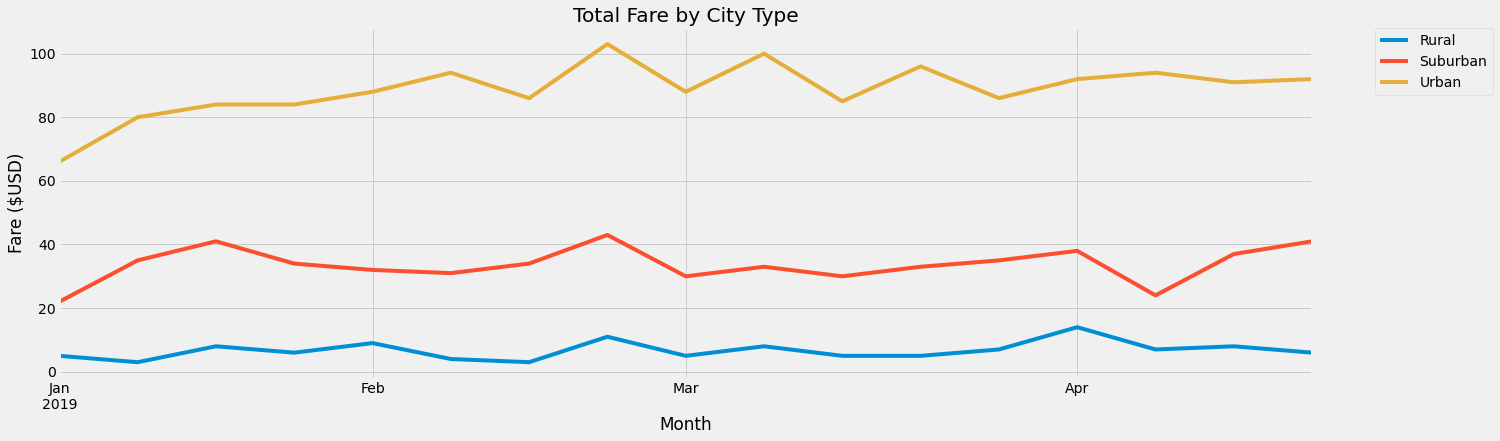

In [104]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weeklyplot = weekly.plot(figsize = (20,6))
weeklyplot.set_title('Total Fare by City Type')
weeklyplot.set_xlabel("Month")
weeklyplot.set_ylabel("Fare ($USD)")
weeklyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('analysis/PyBer_fare_summary.png',bbox_inches='tight')
plt.show();